In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import os

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'Uber Analysis.ipynb',
 'uber-raw-data-apr14 .csv',
 'Untitled.ipynb']

In [3]:
df = pd.read_csv("uber-raw-data-apr14 .csv")

In [4]:
df.describe(include = "all")

,Date/Time,Lat,Lon,Base
count,564516,564516.000000,564516.000000,564516
unique,41999,NaN,NaN,5
top,04-07-2014 20:21,NaN,NaN,B02682
freq,97,NaN,NaN,227808
mean,NaN,40.740005,-73.976817,NaN
std,NaN,0.036083,0.050426,NaN
min,NaN,40.072900,-74.773300,NaN
25%,NaN,40.722500,-73.997700,NaN
50%,NaN,40.742500,-73.984800,NaN
75%,NaN,40.760700,-73.970000,NaN


In [5]:
df.shape

(564516, 4)

In [6]:
df.dtypes

Date/Time     object
Lat          float64
Lon          float64
Base          object
dtype: object

In [7]:
#renaming the columns
df.rename(columns={"Date/Time":"DateTime"},inplace= True)

In [8]:
df.head()

,DateTime,Lat,Lon,Base
0,04-01-2014 00:11,40.7690,-73.9549,B02512
1,04-01-2014 00:17,40.7267,-74.0345,B02512
2,04-01-2014 00:21,40.7316,-73.9873,B02512
3,04-01-2014 00:28,40.7588,-73.9776,B02512
4,04-01-2014 00:33,40.7594,-73.9722,B02512


In [9]:
# converting date time dtype to datetime64[ns]

In [10]:
df["DateTime"] = pd.to_datetime(df.DateTime)

In [11]:
df.dtypes

DateTime    datetime64[ns]
Lat                float64
Lon                float64
Base                object
dtype: object

In [12]:
df["DateTime"].head()

0   2014-04-01 00:11:00
1   2014-04-01 00:17:00
2   2014-04-01 00:21:00
3   2014-04-01 00:28:00
4   2014-04-01 00:33:00
Name: DateTime, dtype: datetime64[ns]

In [13]:
# creating new collumn for day,hr day of week

In [20]:
df['hr']=df['DateTime'].apply(lambda date : date.hour)
df['Dayofmonth']=df['DateTime'].apply(lambda date : date.day)
df['day_Of_Week'] = df['DateTime'].apply(lambda date : date.dayofweek)

In [21]:
df.tail()

,DateTime,Lat,Lon,Base,hr,Dayofmonth,day_Of_Week
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,23,30,2
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,23,30,2
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,23,30,2
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,23,30,2
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764,23,30,2


# Analysis

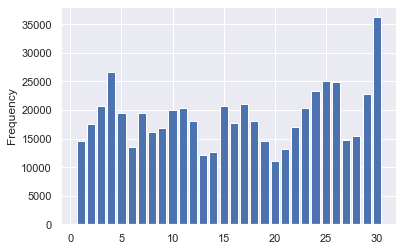

In [32]:
df["Dayofmonth"].plot.hist(bins=30, rwidth=0.8, range=(0.5,30.5))

In [35]:
df.head()

,DateTime,Lat,Lon,Base,hr,Dayofmonth,day_Of_Week
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,0,1,1
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,0,1,1
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,0,1,1
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,0,1,1
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,0,1,1


In [34]:
df.groupby('Dayofmonth').count()

,DateTime,Lat,Lon,Base,hr,day_Of_Week
Dayofmonth,,,,,,
1,14546,14546,14546,14546,14546,14546
2,17474,17474,17474,17474,17474,17474
3,20701,20701,20701,20701,20701,20701
4,26714,26714,26714,26714,26714,26714
5,19521,19521,19521,19521,19521,19521
6,13445,13445,13445,13445,13445,13445
7,19550,19550,19550,19550,19550,19550
8,16188,16188,16188,16188,16188,16188
9,16843,16843,16843,16843,16843,16843


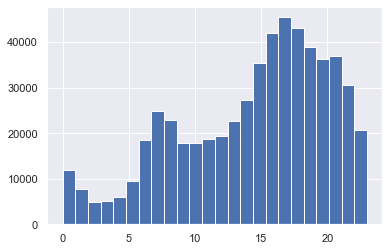

In [40]:
df['hr'].hist(bins=24 )

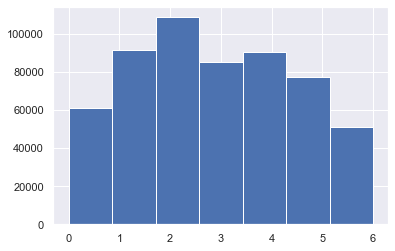

In [41]:
df['day_Of_Week'].hist(bins=7)